In [1]:
# project: p5
# submitter: zzhou443
# partner: none
# hours: 7

In [2]:
import geopandas as gpd
import pandas as pd
import zipfile
import io
import edgar_utils as ed

In [3]:
archive = zipfile.ZipFile('server_log.zip', 'r')

In [4]:
file = archive.open('rows.csv')

In [5]:
csvfile = io.TextIOWrapper(file)

In [6]:
df = pd.read_csv(csvfile)

In [7]:
#q1
int(df["size"].sum())

24801002666

In [8]:
df

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711.0,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019.0,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166.0,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950.0,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918.0,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803.0,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439.0,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986.0,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913.0,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN


In [9]:
#q2
top10 = df.groupby(df["ip"] ,as_index=False).size().sort_values("size", ascending = False).head(10)
top10.set_index("ip")["size"].to_dict()

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [10]:
#q3
len(df[df["code"] >= 400]) / len(df)

0.03466852724527611

In [11]:
#q4
df1 = df.groupby(by = ["cik", "accession", "extention"]).size().sort_values(ascending = False).to_frame()
list1 = list(df1.index[0])
str(int(list1[0])) + "/" + str(list1[1]) + "/" + str(list1[2])

'1627631/0001627631-15-000004/.txt'

In [12]:
#q5 how many requests were made by automated crawlers?
len(df[df["crawler"] != 0.0])

971

In [13]:
import re
ipaddr = "101.1.1.abc"
re.sub(r"[a-z]", "0", ipaddr)

'101.1.1.000'

In [14]:
import netaddr
int(netaddr.IPAddress("34.67.75.25"))

574835481

In [15]:
ips = pd.read_csv("ip2location.csv")
ips

,low,high,code,region
0,0,16777215,-,-
1,16777216,16777471,US,United States of America
2,16777472,16778239,CN,China
3,16778240,16779263,AU,Australia
4,16779264,16781311,CN,China
...,...,...,...,...
174967,3758094336,3758095359,HK,Hong Kong
174968,3758095360,3758095871,CN,China
174969,3758095872,3758096127,SG,Singapore
174970,3758096128,3758096383,AU,Australia


In [16]:
L = [1, 2, 100, 222, 900]
from bisect import bisect
idx = bisect(L, 150)
idx


3

In [17]:
idx = bisect(L, 225)
idx

4

In [18]:
re.sub(r"[a-z]", "0", "101.1.1.abc")

'101.1.1.000'

In [19]:
my_ip = int(netaddr.IPAddress('101.1.1.000'))
my_ip

1694564608

In [20]:
list_low = list(ips["low"])
idx = bisect(list_low, my_ip)
idx
ips.iloc[idx-1]["region"]

'China'

In [21]:
html = """<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="Last-Modified" content="Fri, 12 Feb 2016 00:05:37 GMT" />
<title>EDGAR Filing Documents for 0001050470-16-000051</title>
<link rel="stylesheet" type="text/css" href="/include/interactive.css" />
</head>
<body style="margin: 0">
<!-- SEC Web Analytics - For information please visit: https://www.sec.gov/privacy.htm#collectedinfo -->
<noscript><iframe src="//www.googletagmanager.com/ns.html?id=GTM-TD3BKV"
height="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-TD3BKV');</script>
<!-- End SEC Web Analytics -->
<noscript><div style="color:red; font-weight:bold; text-align:center;">This page uses Javascript. Your browser either doesn't support Javascript or you have it turned off. To see this page as it is meant to appear please use a Javascript enabled browser.</div></noscript>
<!-- BEGIN BANNER -->
<div id="headerTop">
   <div id="Nav"><a href="/index.htm">Home</a> | <a href="/cgi-bin/browse-edgar?action=getcurrent">Latest Filings</a> | <a href="javascript:history.back()">Previous Page</a></div>
   <div id="seal"><a href="/index.htm"><img src="/images/sealTop.gif" alt="SEC Seal" border="0" /></a></div>
   <div id="secWordGraphic"><img src="/images/bannerTitle.gif" alt="SEC Banner" /></div>
</div>
<div id="headerBottom">
   <div id="searchHome"><a href="/edgar/searchedgar/webusers.htm">Search the Next-Generation EDGAR System</a></div>
   <div id="PageTitle">Filing Detail</div>
</div>
<!-- END BANNER -->


<!-- BEGIN BREADCRUMBS -->
<div id="breadCrumbs">
   <ul>
      <li><a href="/index.htm">SEC Home</a> &#187;</li>
      <li><a href="/edgar/searchedgar/webusers.htm">Search the Next-Generation EDGAR System</a> &#187;</li>
      <li><a href="/edgar/searchedgar/companysearch.html">Company Search</a> &#187;</li>
      <li class="last">Current Page</li>
   </ul>
</div>
<!-- END BREADCRUMBS -->

<div id="contentDiv">
<!-- START FILING DIV -->
<div id="formDiv">
   <div id="formHeader">
      <div id="formName">
         <strong>Form SC 13G</strong> - Statement of acquisition of beneficial ownership by individuals: 
      </div>
      <div id="secNum">
         <strong><acronym title="Securities and Exchange Commission">SEC</acronym> Accession <acronym title="Number">No.</acronym></strong> 0001050470-16-000051
      </div>
   </div>
   <div class="formContent">
      <div class="formGrouping">
         <div class="infoHead">Filing Date</div>
         <div class="info">2016-02-12</div>
         <div class="infoHead">Accepted</div>
         <div class="info">2016-02-11 19:05:37</div>
         <div class="infoHead">Documents</div>
         <div class="info">1</div>
      </div>
      <div style="clear:both"></div>
   </div>
</div>
<!-- END FILING DIV -->
<!-- START DOCUMENT DIV -->
<div id="formDiv">
   <div style="padding: 0px 0px 4px 0px; font-size: 12px; margin: 0px 2px 0px 5px; width: 100%; overflow:hidden">
      <p>Document Format Files</p>
      <table class="tableFile" summary="Document Format Files">
         <tr>
            <th scope="col" style="width: 5%;"><acronym title="Sequence Number">Seq</acronym></th>
            <th scope="col" style="width: 40%;">Description</th>
            <th scope="col" style="width: 20%;">Document</th>
            <th scope="col" style="width: 10%;">Type</th>
            <th scope="col">Size</th>
         </tr>
         <tr>
            <td scope="row">1</td>
            <td scope="row">LSV13G123115MEDALLION.TXT</td>
            <td scope="row"><a href="/Archives/edgar/data/1000209/000105047016000051/lsv13g123115medallion.txt">lsv13g123115medallion.txt</a></td>
            <td scope="row">SC 13G</td>
            <td scope="row">8314</td>
         </tr>
         <tr class="blueRow">
            <td scope="row">&nbsp;</td>
            <td scope="row">Complete submission text file</td>
            <td scope="row"><a href="/Archives/edgar/data/1000209/000105047016000051/0001050470-16-000051.txt">0001050470-16-000051.txt</a></td>
            <td scope="row">&nbsp;</td>
            <td scope="row">9803</td>
         </tr>
      </table>	
   </div>
</div>
<!-- END DOCUMENT DIV -->
<!-- START FILER DIV -->
<div id="filerDiv">
   <div class="mailer">Mailing Address
      <span class="mailerAddress">437 MADISON AVENUE</span>
      <span class="mailerAddress">38TH FLOOR</span>
      <span class="mailerAddress">
NEW YORK NY 10022      </span>
   </div>
   <div class="mailer">Business Address
      <span class="mailerAddress">437 MADISON AVE 38 TH FLOOR</span>
      <span class="mailerAddress">
NEW YORK NY 10022      </span>
      <span class="mailerAddress">2123282153</span>
   </div>
<div class="companyInfo">
  <span class="companyName">MEDALLION FINANCIAL CORP (Subject)
 <acronym title="Central Index Key">CIK</acronym>: <a href="/cgi-bin/browse-edgar?CIK=0001000209&amp;action=getcompany">0001000209 (see all company filings)</a></span>
<p class="identInfo"><acronym title="Internal Revenue Service Number">IRS No.</acronym>: <strong>043291176</strong> | State of Incorp.: <strong>DE</strong> | Fiscal Year End: <strong>1231</strong><br />Type: <strong>SC 13G</strong> | Act: <strong>34</strong> | File No.: <a href="/cgi-bin/browse-edgar?filenum=005-48473&amp;action=getcompany"><strong>005-48473</strong></a> | Film No.: <strong>161413579</strong><br /><acronym title="Standard Industrial Code">SIC</acronym>: <b><a href="/cgi-bin/browse-edgar?action=getcompany&amp;SIC=6199&amp;owner=include">6199</a></b> Finance Services<br />Office of Finance</p>
</div>
<div class="clear"></div>
</div>
<div id="filerDiv">
   <div class="mailer">Mailing Address
      <span class="mailerAddress">155 NORTH WACKER DRIVE</span>
      <span class="mailerAddress">SUITE 4600</span>
      <span class="mailerAddress">
CHICAGO IL 60606      </span>
   </div>
   <div class="mailer">Business Address
      <span class="mailerAddress">155 NORTH WACKER DRIVE</span>
      <span class="mailerAddress">SUITE 4600</span>
      <span class="mailerAddress">
CHICAGO IL 60606      </span>
      <span class="mailerAddress">312-460-2443</span>
   </div>
<div class="companyInfo">
  <span class="companyName">LSV ASSET MANAGEMENT (Filed by)
 <acronym title="Central Index Key">CIK</acronym>: <a href="/cgi-bin/browse-edgar?CIK=0001050470&amp;action=getcompany">0001050470 (see all company filings)</a></span>
<p class="identInfo"><acronym title="Internal Revenue Service Number">IRS No.</acronym>: <strong>232772200</strong> | State of Incorp.: <strong>DE</strong> | Fiscal Year End: <strong>1231</strong><br />Type: <strong>SC 13G</strong></p>
</div>
<div class="clear"></div>
</div>
<!-- END FILER DIV -->
</div>"""

In [22]:
[i[0] for i in re.findall(r"((19|20)\d{2}-\d{2}-\d{2})", html)]

['2016-02-12', '2016-02-11']

In [23]:
if len(re.findall(r"SIC=(\d+)", html)) != 0:
    sic = int(re.findall(r"SIC=(\d+)", html)[0])

In [24]:
for addr_html in re.findall(r'<div class="mailer">([\s\S]+?)</div>', html):
    for i in re.findall(r'([\s\S]+?)</span>', addr_html):
        print(i)

Mailing Address
      <span class="mailerAddress">437 MADISON AVENUE

      <span class="mailerAddress">38TH FLOOR

      <span class="mailerAddress">
NEW YORK NY 10022      
Business Address
      <span class="mailerAddress">437 MADISON AVE 38 TH FLOOR

      <span class="mailerAddress">
NEW YORK NY 10022      

      <span class="mailerAddress">2123282153
Mailing Address
      <span class="mailerAddress">155 NORTH WACKER DRIVE

      <span class="mailerAddress">SUITE 4600

      <span class="mailerAddress">
CHICAGO IL 60606      
Business Address
      <span class="mailerAddress">155 NORTH WACKER DRIVE

      <span class="mailerAddress">SUITE 4600

      <span class="mailerAddress">
CHICAGO IL 60606      

      <span class="mailerAddress">312-460-2443


In [25]:
#q6

ip = ips["low"].sort_values(ascending = False)[1]
ip
ed.lookup_region(str(ip))

'United States of America'

In [26]:
df

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711.0,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019.0,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166.0,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950.0,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918.0,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803.0,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439.0,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986.0,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913.0,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN


In [27]:
ips

,low,high,code,region
0,0,16777215,-,-
1,16777216,16777471,US,United States of America
2,16777472,16778239,CN,China
3,16778240,16779263,AU,Australia
4,16779264,16781311,CN,China
...,...,...,...,...
174967,3758094336,3758095359,HK,Hong Kong
174968,3758095360,3758095871,CN,China
174969,3758095872,3758096127,SG,Singapore
174970,3758096128,3758096383,AU,Australia


In [28]:
all_ips = df.groupby(df["ip"] ,as_index=False).size().sort_values("size", ascending = False)
all_ips_df = all_ips.set_index("ip")["size"].to_frame()
_1000_ips_df = all_ips_df[all_ips_df["size"] > 1000]

In [29]:
_1000_country_dic = {}
greater_1000_dict = _1000_ips_df.to_dict()["size"]
list_greater_1000 = list(greater_1000_dict.keys())
for i in list_greater_1000:
    country = ed.lookup_region(i)
    if country not in _1000_country_dic:
        _1000_country_dic[country] = 1
    else:
        _1000_country_dic[country] = _1000_country_dic[country] + 1
_1000_country_dic

{'United States of America': 26,
 'China': 3,
 'India': 2,
 'United Kingdom of Great Britain and Northern Ireland': 3,
 'Korea (Republic of)': 2,
 'Canada': 1,
 'France': 1,
 'Bulgaria': 1,
 'Ireland': 5,
 'Australia': 1}

In [30]:
country_dic = {}
all_ip_dic = all_ips_df.to_dict()["size"]
list_all_ip = list(all_ip_dic.keys())
for i in list_all_ip:
    country = ed.lookup_region(i)
    if country not in country_dic:
        country_dic[country] = 1
    else:
        country_dic[country] = country_dic[country] + 1

    

In [31]:
#q7
country_dic

country_ratio_dic = {}
for i in country_dic:
    if i not in _1000_country_dic:
        country_ratio_dic[i] = 0.0
    else:
        country_ratio_dic[i] = _1000_country_dic[i] / country_dic[i]

country_ratio_dic

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Italy': 0.0,
 'Virgin Islands (British)': 0.0,
 'Singapore': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Denmark': 0.0,
 'Switzerland': 0.0,
 'Sweden': 0.0,
 'Egypt': 0.0,
 'Honduras': 0.0,
 'Brazil': 0.0,
 'Greece': 0.0,
 'Philippines': 0.0,
 'Iraq': 0.0,
 'South Africa': 0.0,
 'Tanzania, United Repu

In [32]:
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    with myzip.open("850693/0000850693-07-000159/-index.htm") as myfile:
        html = myfile.read().decode("utf-8") 

In [33]:
#q8
fil = ed.Filing(html)
fil.dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [34]:
#q9
address = {}
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for file in name_list:
        if file.endswith('-index.htm') or file.endswith('-index.html'):
             with myzip.open(file) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                if fil.state() not in address and fil.state() != None:
                    address[fil.state()] = 1
                elif fil.state() != None:
                    address[fil.state()] = address[fil.state()] + 1
                    
{k: v for k, v in sorted(address.items(), key=lambda item: item[1], reverse = True)}

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'CO': 25,
 'IL': 25,
 'PA': 25,
 'NJ': 23,
 'FL': 21,
 'VA': 15,
 'MN': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'NC': 9,
 'WI': 9,
 'GA': 8,
 'OK': 7,
 'OX': 6,
 'NV': 6,
 'IA': 6,
 'UT': 5,
 'KS': 5,
 'AZ': 5,
 'IN': 4,
 'TN': 4,
 'MO': 4,
 'WA': 3,
 'KY': 2,
 'NE': 2,
 'LA': 2,
 'OR': 2,
 'WV': 2,
 'MS': 1,
 'AL': 1,
 'SD': 1,
 'NM': 1,
 'AR': 1,
 'VT': 1,
 'ID': 1,
 'DC': 1,
 'ME': 1}

In [35]:
#q10
sic = {}
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for file in name_list:
        if file.endswith('-index.htm') or file.endswith('-index.html'):
             with myzip.open(file) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                if fil.sic not in sic and fil.sic != None:
                    sic[fil.sic] = 1
                elif fil.sic != None:
                    sic[fil.sic] = sic[fil.sic] + 1
                    
sic
        

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [36]:
accession_names_list = []
list_cik = list(df["cik"])
list_accession = list(df["accession"])
list_extention = list(df["extention"])

for i in range(len(list_cik)):
    accession_names_list.append(str(int(list_cik[i])) + "/" + str(list_accession[i]) + "/" + str(list_extention[i]))
accession_names_list

['1111711/0001193125-12-324016/-index.htm',
 '789019/0001193125-06-031505/.txt',
 '800166/0001279569-16-003038/-index.htm',
 '354950/0000950123-09-011236/-index.htm',
 '1313918/0001209191-06-031555/.txt',
 '1111711/0001193125-12-236306/-index.htm',
 '1095701/0000950129-03-002887/.txt',
 '933136/0000912057-02-033348/.txt',
 '95521/0000095521-16-000309/svu-20160910_def.xml',
 '878526/0001157523-10-006222/a6487286.htm',
 '768835/0000768835-05-000030/edgar.xml',
 '1210227/0001209191-16-142375/-index.htm',
 '1229849/0000919574-03-001921/-index.htm',
 '790715/0001437749-13-002399/-index.htm',
 '1379895/0001379895-14-000004/dyn-ex231_20131231x10k.htm',
 '1156633/0000950123-11-058396/-index.htm',
 '1304366/0001181431-05-041887/rrd86833.xml',
 '1047570/9999999997-03-026621/.txt',
 '1545085/0001209191-16-157128/-index.htm',
 '1688820/0001688820-16-000001/primary_doc.xml',
 '1663897/0001654954-16-003893/primary_doc.xml',
 '1343719/0001144204-16-141855/-index.htm',
 '1569608/0001569608-16-000080/-

In [37]:
#Q11: what is the distribution of requests across industries?
sic = {}
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for path in accession_names_list:
        if path in name_list:
            with myzip.open(path) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                if fil.sic not in sic and fil.sic != None:
                    sic[fil.sic] = 1
                elif fil.sic != None:
                    sic[fil.sic] = sic[fil.sic] + 1
                    
sic

{k: v for k, v in sorted(sic.items(), key=lambda item: item[1], reverse = True)}

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [38]:
#Q12: how many requests were made in each hour?
hour_list = [i for i in range(0, 24)]
hour_list_update = []
time_dic = {}
for i in hour_list:
    if len(str(i)) < 2:
        i = str(0) + str(i)
    hour_list_update.append(str(i))
hour_list_update

time_list = list(df["time"])

for i in time_list:
    i = i[0:2]
    if i in hour_list_update and i not in time_dic:
        time_dic[i] = 1
    elif i in hour_list_update and i in time_dic:
        time_dic[i] = time_dic[i] + 1
time_dic

new_time_dic = {}
for i in time_dic:
    if i[0] == 0:
        key = int(i[1])
    else:
        key = int(i)
    new_time_dic[key] = time_dic[i]
new_time_dic

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

In [39]:
# ip = df["ip"]
# Australia_ip_list = []
# France_ip_list = []
# VietNam_ip_list = []

# for i in range(len(ip)):
#     if ed.lookup_region(df["ip"][i]) == "Australia":
#         path = str(int(df["cik"][i])) + "/" + str(df["accession"][i]) + "/" + str(df["extention"][i])
#         print(path)
#         Australia_ip_list.append(path)
#     if ed.lookup_region(df["ip"][i]) == "France":
#         path = str(int(df["cik"][i])) + "/" + str(df["accession"][i]) + "/" + str(df["extention"][i])
#         France_ip_list.append(path)
#     if ed.lookup_region(df["ip"][i]) == "Viet Nam":
#         path = str(int(df["cik"][i])) + "/" + str(df["accession"][i]) + "/" + str(df["extention"][i])
#         VietNam_ip_list.append(path)

In [40]:
Australia_ip_list = []
France_ip_list = []
VietNam_ip_list = []
for row in df.itertuples():
    country = ed.lookup_region(row.ip)
    if country == "Australia":
        path = str(int(row.cik)) + "/" + str(row.accession) + "/" + str(row.extention)
        Australia_ip_list.append(path)
    elif country == "France":
        path = str(int(row.cik)) + "/" + str(row.accession) + "/" + str(row.extention)
        France_ip_list.append(path)
    elif country == "Viet Nam":
        path = str(int(row.cik)) + "/" + str(row.accession) + "/" + str(row.extention)
        VietNam_ip_list.append(path)

In [41]:
states_au = []
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for path in Australia_ip_list:
        if path in name_list:
            with myzip.open(path) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                states_au.append(fil.state())
states_au

['NY']

In [42]:
states_France = []
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for path in France_ip_list:
        if path in name_list:
            with myzip.open(path) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                if fil.state() not in states_France:
                    states_France.append(fil.state())
states_France


['NJ', 'CA']

In [43]:
states_vit = []
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for path in VietNam_ip_list:
        if path in name_list:
            with myzip.open(path) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                if fil.state() not in states_vit:
                    states_vit.append(fil.state())
states_vit

['CA', 'VA']

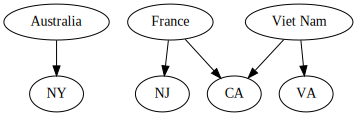

In [44]:
#Q13: what is the geographic overlap in interest between Australia, France, and Viet Nam?
from graphviz import Digraph, Graph

g = Digraph()
g.node("Australia")
g.node("France")
g.node("Viet Nam")
all_state = states_au + states_France + states_vit
all_state_update  = []
for i in all_state:
    if i not in all_state_update:
        all_state_update.append(i)
for i in all_state_update:
    g.node(i)
g.edge("Australia", states_au[0])
g.edge("France", states_France[0])
g.edge("France", states_France[1])
g.edge("Viet Nam", states_vit[0])
g.edge("Viet Nam", states_vit[1])
g

In [45]:
accession_names_list
address_list = []
with zipfile.ZipFile('docs.zip', 'r') as myzip:
    name_list = myzip.namelist()
    for path in accession_names_list:
        if path in name_list:
            with myzip.open(path) as myfile:
                html = myfile.read().decode("utf-8")
                fil = ed.Filing(html)
                addresses = fil.addresses
                address_list.extend(addresses)
address_list

['801 EAST 86TH AVE\nMERRILLVILLE IN 46410-6272',
 '801 EAST 86TH AVE\nMERRILLVILLE IN 46410-6272\n2196475200',
 '1800 - 555 BURRARD ST.\nVANCOUVER A1 V7X 1M9',
 '1800 - 555 BURRARD ST.\nVANCOUVER A1 V7X 1M9\n(604) 696-4100',
 '3980 PREMIER DRIVE\nSUITE 210\nHIGH POINT NC 27265',
 '1226 EASTCHESTER DRIVE\nHIGH POINT NC 27265',
 '1226 EASTCHESTER DRIVE\nHIGH POINT NC 27265\n3364769200',
 '6600 LBJ FREEWAY\nSTE 210\nDALLAS TX 75240',
 '6600 LBJ FREEWAY\nSTE 210\nDALLAS TX 75240\n206-395-4152',
 '1910 FAIRVIEW AVE E\nSUITE 200\nSEATTLE WA 98102',
 '1910 FAIRVIEW AVE E\nSUITE 200\nSEATTLE WA 98102\n206-728-9063',
 '1800 - 555 BURRARD ST.\nVANCOUVER A1 V7X 1M9',
 '1800 - 555 BURRARD ST.\nVANCOUVER A1 V7X 1M9\n(604) 696-4100',
 '345 INVERNESS DRIVE SOUTH, BUILDING C\nSuite 310\nENGLEWOOD CO 80112',
 '345 INVERNESS DRIVE SOUTH, BUILDING C\nSuite 310\nENGLEWOOD CO 80112\n303-858-8358',
 '3450 INVERNESS DRIVE SOUTH\nBUILDING C, SUITE 310\nENGLEWOOD CO 80112',
 '1600 REDBUD BOULEVARD\nSUITE 400\

In [46]:
#Q14: what are the most commonly seen street addresses?
address_dic = {}
address_dic_update = {}
for i in address_list:
    if i not in address_dic:
        address_dic[i] = 1
    else:
        address_dic[i] = address_dic[i] + 1
for i in address_dic:
    if address_dic[i] >= 225:
        address_dic_update[i] = address_dic[i]
address_dic_update

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

<AxesSubplot:>

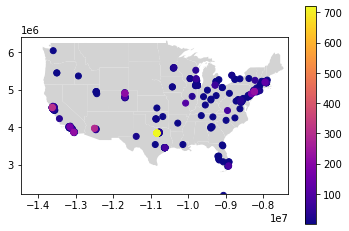

In [47]:
#q15
import matplotlib.pyplot as plt
from shapely.geometry import Point
address_dic_update
fig, ax = plt.subplots()
location = gpd.read_file("locations.geojson")
gdf = gpd.read_file("shapes/cb_2018_us_state_20m.shp")
d = {'col1': ['name1', 'name2'], 'geometry': [Point(-130, -55), Point(20, 50)]}
g = gpd.GeoDataFrame(d)
g = g.set_crs(gdf.crs)
g = g.to_crs("epsg:3395")
xlim1 = list(g["geometry"][0].coords.xy[0])
xlim2 = list(g["geometry"][0].coords.xy[1]) 
ylim1 = list(g["geometry"][1].coords.xy[0])
ylim2 = list(g["geometry"][1].coords.xy[1])
ax.set_xlim([xlim1[0], xlim2[0]])
ax.set_ylim([ylim1[0], ylim2[0]])
gdf2 = gdf.to_crs("epsg:3395")
gdf2.plot(color = "lightgray", ax = ax)
location = location.to_crs("epsg:3395")
location_col_values = []
for i in location["address"]:
    if i in address_dic:
        location_col_values.append(address_dic[i])
location["column"] = location_col_values
location = location.sort_values(by = "column")
location.plot(ax = ax, column = "column", cmap = "plasma", legend = True)

In [48]:
from shapely.geometry import Point
d = {'col1': ['name1', 'name2'], 'geometry': [Point(-130, -55), Point(20, 50)]}
g = gpd.GeoDataFrame(d)
g = g.set_crs(gdf.crs)
g = g.to_crs("epsg:3395")
xlim1 = list(g["geometry"][0].coords.xy[0])
xlim2 = list(g["geometry"][0].coords.xy[1]) 
ylim1 = list(g["geometry"][1].coords.xy[0])
ylim2 = list(g["geometry"][1].coords.xy[1])

In [49]:
xlim1

[-14471533.803125564]